 # Customer Segmentation Analysis

### Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an e-commerce company. By analyzing customer behavior and purchase patterns, the goal is to group customers into distinct segments. This segmentation can inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.

#### Key Concepts and Challenges:

Data Collection: Obtain a dataset containing customer information, purchase history, and
relevant data.

Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle
any missing or inconsistent data.

Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of
purchases, etc.

Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment
customers based on behavior and purchase patterns.

Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer
segments.

Insights and Recommendations: Analyze characteristics of each segment and provide
insights.

### Loading Necessary Llibraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

### 1. Data Exploration and Cleaning:

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/preethiakshai/OASIS/main/ifood_df.csv"
try:
    data = pd.read_csv(url, on_bad_lines='skip')
    print(data)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

## Data Set Study

The dataset consists of 2,205 entries and 39 columns, with the following structure:


    Income: Customer's annual income.
    

    Kidhome, Teenhome: Number of children (young and teens) in the household.
    

    Recency: Days since the last purchase.


    MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Monetary amounts spent on various product categories.

    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth: Purchase details by channel.

    AcceptedCmp1-5: Participation in specific marketing campaigns.

    Complain: Whether the customer has complained.

    MntTotal, MntRegularProds: Total spending and spending on regular products.

In [8]:
shape_=data.shape
print("Number of rows =",shape_[0])
print("Number of columns = ", shape_[1])

Number of rows = 2205
Number of columns =  39


In [9]:
# listing the columns
data.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [16]:
# identifying the null values
print("\nMissing Values: \n",data.isnull().sum().sort_values(ascending=False))


Missing Values: 
 Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5       

#### There no null value in the data set

In [20]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

## 2. Descriptive Statistics

In [17]:
# Summary statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
               Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468 

In [24]:
# Calculate Total Revenue
total_revenue = data['MntTotal'].sum()

In [25]:
# Calculate Total Number of Purchases
total_purchases = (data['NumDealsPurchases'] + 
                   data['NumWebPurchases'] + 
                   data['NumCatalogPurchases'] + 
                   data['NumStorePurchases']).sum()

In [26]:
# Calculate Average Purchase Value
average_purchase_value = total_revenue / total_purchases if total_purchases > 0 else 0


In [27]:
# Calculate Average Order Value (AOV)
average_order_value = total_revenue / total_purchases if total_purchases > 0 else 0



In [28]:
# Calculate Repeat Purchase Rate
repeat_customers = data[data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1) > 1].shape[0]
total_customers = data['Income'].count()  # Total number of entries
repeat_purchase_rate = (repeat_customers / total_customers) * 100 if total_customers > 0 else 0



In [29]:
# Calculate Customer Lifetime Value (CLV)
clv = total_revenue / total_customers if total_customers > 0 else 0



In [30]:
# Print metrics
print(f"Total Revenue: {total_revenue}")
print(f"Total Purchases: {total_purchases}")
print(f"Average Purchase Value: {average_purchase_value}")
print(f"Average Order Value (AOV): {average_order_value}")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")
print(f"Customer Lifetime Value (CLV): {clv:.2f}")

Total Revenue: 1240896
Total Purchases: 32828
Average Purchase Value: 37.799926891677835
Average Order Value (AOV): 37.799926891677835
Repeat Purchase Rate: 99.82%
Customer Lifetime Value (CLV): 562.76



Total Revenue: The total monetary value from customer spending, calculated using MntTotal.

Total Purchases: The total number of purchases made through various channels.

Average Purchase Value: The average amount spent per purchase.

Average Order Value (AOV): The average order value calculated similarly to the average purchase value.

Repeat Purchase Rate: Indicates how many customers made multiple purchases, expressed as a percentage.

Customer Lifetime Value (CLV): Represents the average revenue generated by a customer over their lifetime.


### Customer Segmentation

In [36]:
#Data Preprocessing for Clustering
# Select relevant features and standardize them
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

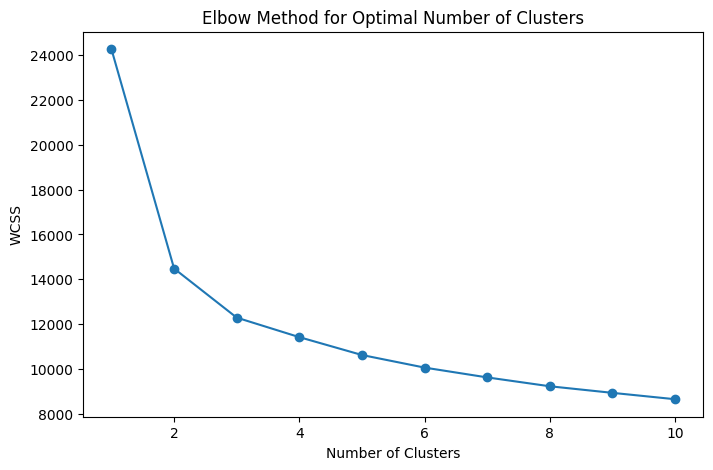

In [37]:
# Step 4: Determine Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualize the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# Apply K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Using 4 clusters based on the elbow method
data['Cluster'] = kmeans.fit_predict(X_scaled)


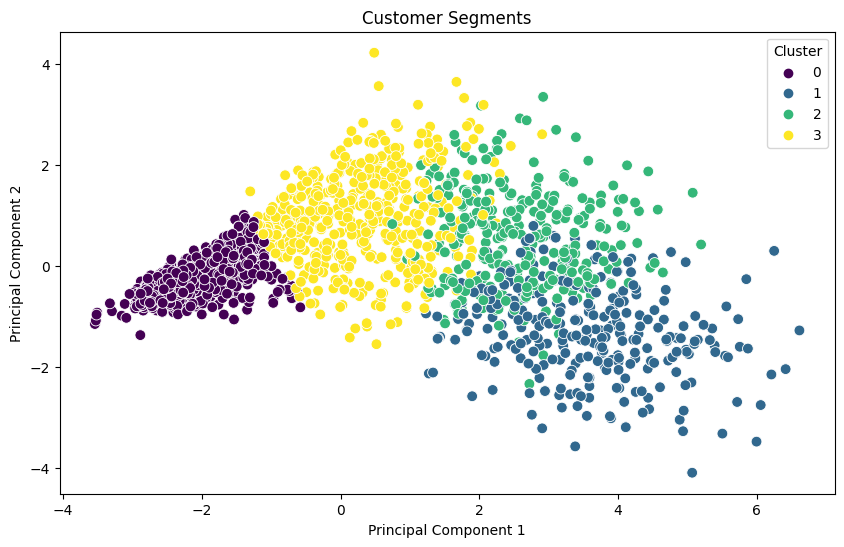

In [39]:
# Visualization of Clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster Summary:
                Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        33885.073441  49.147887   38.811871   4.570423        20.768612   
1        73669.462733  48.993789  497.698758  94.959627       416.649068   
2        74549.723944  51.391549  768.061972  38.749296       419.439437   
3        56101.567416  47.176030  381.260300  17.496255       113.870787   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
Cluster                                                                     
0               6.344064          4.673038     14.040241         2.010060   
1             131.236025         95.906832     93.363354         5.518634   
2              59.509859         41.138028     66.856338         5.490141   
3              25.398876         18.140449     55.043071         6.213483   

         NumStorePurchases  NumCatalogPurchases  
Cluster    

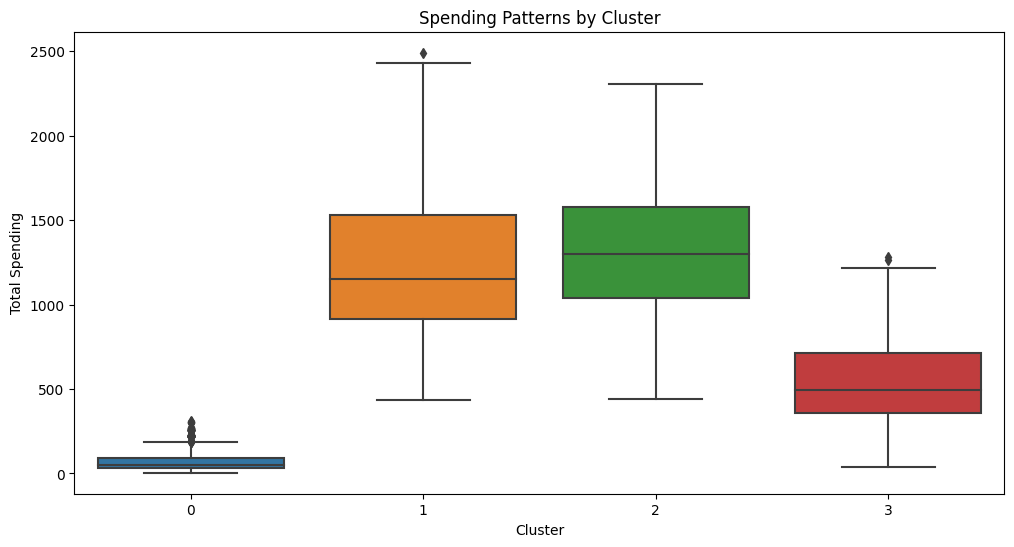

In [40]:
# Calculate mean values for each cluster for key features
cluster_summary = data.groupby('Cluster')[features].mean()

print("\nCluster Summary:\n", cluster_summary)

# Display box plots for spending patterns by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='MntTotal', data=data)
plt.title('Spending Patterns by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.show()

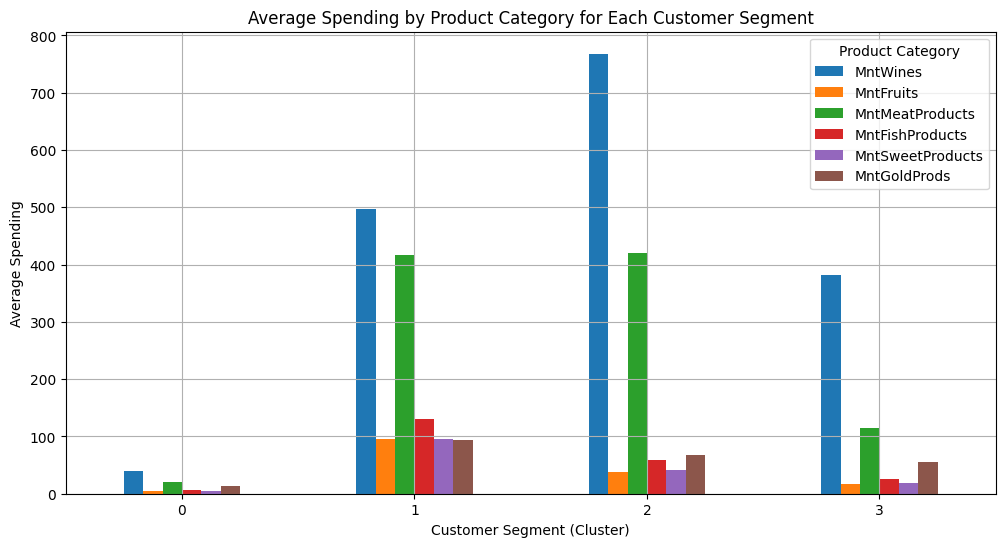

In [41]:
# Calculate average spending for each cluster
average_spending = data.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot bar chart for average spending in each product category by cluster
average_spending.plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending by Product Category for Each Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.grid()
plt.show()


#### Summary 

Cluster 0 : This cluster has the lowest average income and spending across all categories. Customers in this segment are moderate spenders with a preference for store purchases over online purchases. Their recency indicates they are moderately engaged but not frequent purchasers.

Cluster 1 : This cluster represents high-income customers who spend significantly more than others across all categories. They have a balanced approach to purchasing across different channels, particularly favoring both web and store purchases. This segment is highly valuable due to their high spending.

Cluster 2 : Similar to Cluster 1, this group has a high income and significant spending, especially on wines. They also utilize multiple purchasing channels effectively. The slightly higher recency may indicate that they are less engaged compared to Cluster 1, potentially indicating a need for targeted marketing efforts to increase their purchasing frequency.

Cluster 3 : This cluster has moderate income and spending levels. Customers are relatively balanced in their spending but tend to have lower expenditures on fruits and sweets. Their engagement level is slightly better, as indicated by a relatively lower recency. They make good use of web and store channels, making them responsive to both online and offline marketing.



### Insights and Recommendations 

1. Focus on Cross-Channel Strategies:

      Clusters 1, 2, and 3 demonstrate strong multi-channel purchasing behaviors, indicating an opportunity to use cross-channel promotions and incentives to keep them engaged across all shopping platforms.

2. Upsell Premium Products to High-Spending Clusters:

    Clusters 1 and 2 are prime candidates for premium products and exclusive offers, especially in categories where they already spend heavily, like wines and meats.

3. Build Engagement in Cost-Sensitive Segments:

    Cluster 0 is cost-sensitive and mainly prefers in-store purchases. They can be encouraged with value-driven campaigns, loyalty points, and occasional in-store events to boost loyalty and spending.

4. Personalized Catalog and Web Content:

    Cluster 2’s catalog preference highlights the need for targeted, curated shopping experiences. Similarly, providing personalized web recommendations for Clusters 1 and 3 can deepen customer engagement.